In [173]:
#Observable Trends
# 1. CBS is the most positive news site over twitter for the last 100 tweets 
# 2. The New York Times is the most negative news site over twitter for the last 100 tweets
# 3. All News sites are more positive than negative over the last 100 tweets

In [174]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='onedork')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, consumer_secret, access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [188]:
#List of Target Users
userlist = ['@BBC', '@CBS', '@CNN', '@FoxNews', '@nytimes']
#Create a dictionary to store all of the compound sentiment results for the graphs
compounddict = {}
#Create a dictionary for polarity scores of each tweet, media sources and its date created
sentiments = []
#Iterate over Users
for user in userlist:
    #Create a new key corresponding to the current user, this prevents python from adding results to any other keys
    compounddict[user] = []
    #Create a counter for the tweets to use in the x axis of the scatter plot
    counter = 1
    #List for the scatter plot x-axis
    tweetsago = []
    oldest_tweet = None
    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):
        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, max_id = oldest_tweet)
        # Loop through all tweets
        for tweet in public_tweets:
            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet['text'])
            #Add all results to the dictionary under the key for the current user
            compounddict[user].append(results['compound'])
            #All polarity scores calculated and added to list
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            sentiments.append({"Date": tweet["created_at"],
                           "Media Source": user,
                           "Text": tweet['text'],
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
            
            # Get Tweet ID, subtract 1, and assign to oldest_tweet
            oldest_tweet = tweet['id'] - 1
            #Append counter to the x_axis data
            tweetsago.append(counter)
            # Add to counter 
            counter += 1

In [190]:
#Create a df with all tweet data and export to csv
infodf = pd.DataFrame(sentiments, columns=('Media Source', 'Tweets Ago', 'Date', 'Positive', 'Negative', 'Neutral', 'Compound', 'Text'))
infodf.to_csv("Tweet_data.csv")
infodf.head()

,Media Source,Tweets Ago,Date,Positive,Negative,Neutral,Compound,Text
0,@BBC,1,Tue Apr 10 18:42:00 +0000 2018,0.0,0.842,0.158,-0.4927,It wasn't until Henry VIII's reign that the #T...
1,@BBC,2,Tue Apr 10 18:00:27 +0000 2018,0.0,0.784,0.216,-0.5106,Meet Rebekah - a former professional footballe...
2,@BBC,3,Tue Apr 10 16:58:05 +0000 2018,0.0,1.000,0.000,0.0000,🌶🤯 A man who ate the world's hottest chilli pe...
3,@BBC,4,Tue Apr 10 16:34:54 +0000 2018,0.0,1.000,0.000,0.0000,"RT @bbccomedy: Henry of Eight, the Tudor Kim K..."
4,@BBC,5,Tue Apr 10 16:32:08 +0000 2018,0.0,1.000,0.000,0.0000,👭 Ten celebrity pairs who look so freakily ali...


In [176]:
#Use the df created for graphing to get the media source and compound score
#Add the x-axis data for the scatter plot to the dictionary
compounddict['Tweets Ago'] = tweetsago
#Convert dictionary with all compound results by key and tweets ago data into the dataframe and show it
df = pd.DataFrame(compounddict)
df.head()

,@BBC,@CBS,@CNN,@FoxNews,@nytimes,Tweets Ago
0,-0.4927,0.0000,0.0000,0.0000,0.0000,1
1,-0.5106,0.9042,0.0000,0.0000,0.0000,2
2,0.0000,0.0000,0.5859,0.5994,-0.4404,3
3,0.0000,0.7269,0.0000,-0.2960,-0.4404,4
4,0.0000,0.4404,0.0000,0.2023,0.0000,5


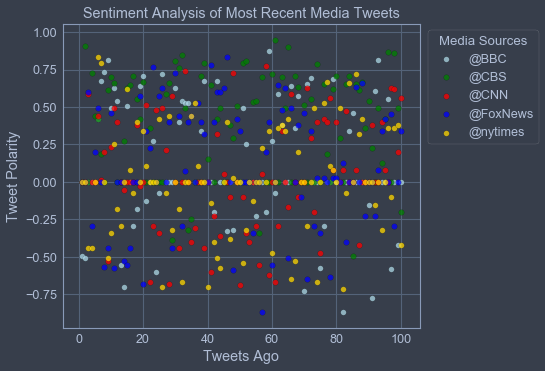

In [194]:
#Create x-axis and list of colors to use for the plot
x_axis = df['Tweets Ago']
colorlist = ['lightblue', 'green', 'red', 'blue', 'gold']
#Looping through all users in the userslist of media sources, construct a scatter plot using the 
#x-axis and their data from the dataframe (named y-axis)
#Then set the color to be the corresponding color in the colorslist. This enables me to make 5 scatter plots in one graph line
for x in range(0,len(userlist)):
    y_axis = df[userlist[x]]
    plt.scatter(x_axis, y_axis, marker="o", facecolors=colorlist[x], edgecolors="black", alpha=0.75)
#Set Title and Axes labels
plt.title("Sentiment Analysis of Most Recent Media Tweets")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
#Set legend, place it in the upper right and use bbox_to_anchor to move it outside of the cluttered plot. 
#Set its title to Media Sources
plt.legend(loc='upper right', bbox_to_anchor=(1.35, 1), title='Media Sources')
plt.savefig('Sentiment_Analysis_Scatter.png')
plt.show()

In [178]:
#Create variables for all of the mean compound polarity scores for each news organizations tweets
bbcmean = df['@BBC'].mean()
cbsmean = df['@CBS'].mean()
cnnmean = df['@CNN'].mean()
foxmean = df['@FoxNews'].mean()
nytimesmean = df['@nytimes'].mean()
#Create a list to hold these mean values
means = [bbcmean, cbsmean, cnnmean, foxmean, nytimesmean]
#Format them to two decimal places
formattedmeans = ["%.2f" % mean for mean in means]

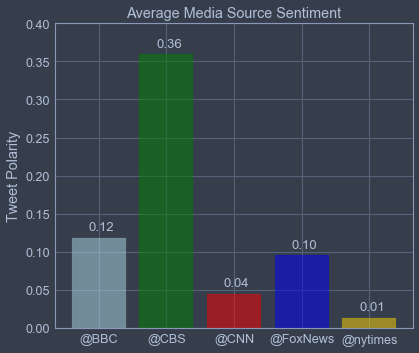

In [193]:
#Define x-axis, list of colors for the plot, locations of the x-ticks, and x,y locations for the text label
x_axis = np.arange(len(userlist))
colorlist = ['lightblue', 'green', 'red', 'blue', 'gold']
tick_locations = []
text_xlocations = []
text_ylocations = []
#Construct bar plot
bar = plt.bar(x_axis, means, color='r', alpha=0.5, align="edge")
#Looping through the created bar chart I set a tick and text location and save them to the list
#I then set the corresponding bar in the bar chart to the correct color (The default bar chart 
#Had only red bars) Lastly plot the text and the correct location.
for x in x_axis:
    tick_locations.append(x+0.4)
    #Centers text on bar
    text_xlocations.append(x+0.25)
    #Places text right above the top of the bar
    text_ylocations.append(means[x]+0.01)
    #Sets bar color
    bar[x].set_color(colorlist[x])
    #Prints the text (The formatted mean from above) at the specified location
    plt.text(text_xlocations[x], text_ylocations[x], str(formattedmeans[x]))
    
#With the tick_locations set as a list, creat all x-ticks with the names of the organizations
plt.xticks(tick_locations, userlist)
#Modify ylim to have space for text labels
plt.ylim(0, 0.40)
#Create title and y axis lables
plt.title("Average Media Source Sentiment")
plt.ylabel("Tweet Polarity")
plt.savefig('Average_Media_Sentiment_Barchart')
plt.show()